# Quick Start (oda api v1.1.26)

In [24]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook


## Connection to the dispatcher 

### build the dispatcher object

In [25]:
#TODO: change to prod
disp=DispatcherAPI(url='https://frontend-staging.obsuks1.unige.ch/mmoda/dispatch-data',instrument='mock')

In [26]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar
antares
spi_acs


### get the description of the instrument

In [27]:
disp.get_instrument_description('isgri')

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "1E 1740.7-2942"}, {"name": "RA", "units": "deg", "value": 265.97845833}, {"name": "DEC", "units": "deg", "value": -29.74516667}, {"name": "T1", "units": "isot", "value": "2017-03-06T13:26:48.000"}, {"name": "T2", "units": "isot", "value": "2017-03-06T15:32:27.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 15.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": "OSA11.1"}, {"name": "integ

In [28]:
data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_image',
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2003-03-16T00:03:12.0',
                                 osa_version='OSA10.2',
                                 RA=30,
                                 DEC=-37.844167,
                                 detection_threshold=5.0,
                                 radius=15.,
                                 product_type='Dummy')

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54735.165023 from DATE-OBS.
Set MJD-END to 54735.638125 from DATE-END'. [astropy.wcs.wcs]
/home/savchenk/.pyenv/versions/3.9.6/lib/python3.9/site-packages/oda_api/plot_tools.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


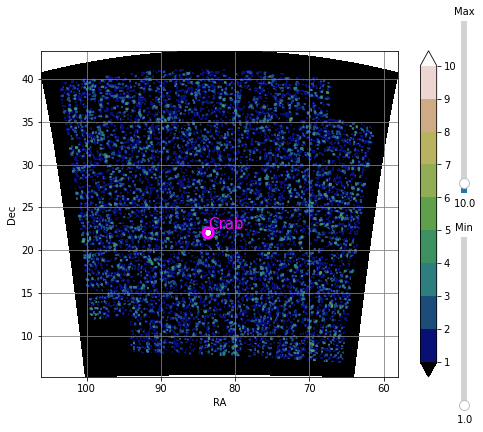

In [29]:
import oda_api.plot_tools

img = oda_api.plot_tools.OdaImage(data_collection)

img.show()

In [71]:
from oda_api.token import discover_token
token = discover_token()

token = open(os.path.join(os.getenv('HOME'), '.oda-token')).read().strip()

disp.post_data_product_to_gallery(token=token).json()

{'cdci_data_analysis_version': '1.3.2',
 'config': {'dispatcher-config': {'cfg_dict': {'dispatcher': {'bind_options': {'bind_host': '0.0.0.0',
      'bind_port': 8000},
     'dispatcher_callback_url_base': 'http://dispatcher.production.iu.odahub.io:31611',
     'dummy_cache': 'dummy-cache',
     'email_options': {'bcc_receivers_email_addresses': ['vladimir.savchenko@gmail.com'],
      'cc_receivers_email_addresses': [],
      'email_sending_job_submitted': True,
      'email_sending_job_submitted_default_interval': 1209600,
      'email_sending_timeout': True,
      'email_sending_timeout_default_threshold': 1,
      'sender_email_address': 'postmaster@in.odahub.io',
      'smtp_port': 25,
      'smtp_server': 'postfix-relay'},
     'product_gallery_options': {'product_gallery_url': 'http://cdciweb02.internal.odahub.io/mmoda-pg'},
     'products_url': 'https://www.astro.unige.ch/mmoda/'}},
   'origin': {'filepath': '/dispatcher/conf/conf_env.yml',
    'set_by': 'command line /pyenv/ver

In [67]:
import requests

product_title = "nice title"
params = {
    'job_id': disp.job_id,
    'session_id': disp.session_id,
    'src_name': '1E 1740.7-2942',
    'content_type': 'data_product',
    'product_title': product_title,
    'E1_keV': 45,
    'E2_kev': 125,
    'DEC': 145,
    'RA': 95.23,
    'T1': '2018-01-01',
    'T2': '2021-12-01',
    'token': token
}

# send test img
img_file_obj = {'media': open(os.path.join(os.getenv('HOME'), 'dispatcher-app/data/dummy_prods/ds9.jpeg'), 'rb')}

c = requests.post(disp.url + "/post_product_to_gallery",
                  params={**params},
                  files=img_file_obj
                  )

c.json()

{'cdci_data_analysis_version': '1.3.2',
 'config': {'dispatcher-config': {'cfg_dict': {'dispatcher': {'bind_options': {'bind_host': '0.0.0.0',
      'bind_port': 8000},
     'dispatcher_callback_url_base': 'http://dispatcher.production.iu.odahub.io:31611',
     'dummy_cache': 'dummy-cache',
     'email_options': {'bcc_receivers_email_addresses': ['vladimir.savchenko@gmail.com'],
      'cc_receivers_email_addresses': [],
      'email_sending_job_submitted': True,
      'email_sending_job_submitted_default_interval': 1209600,
      'email_sending_timeout': True,
      'email_sending_timeout_default_threshold': 1,
      'sender_email_address': 'postmaster@in.odahub.io',
      'smtp_port': 25,
      'smtp_server': 'postfix-relay'},
     'product_gallery_options': {'product_gallery_url': 'http://cdciweb02.internal.odahub.io/mmoda-pg'},
     'products_url': 'https://www.astro.unige.ch/mmoda/'}},
   'origin': {'filepath': '/dispatcher/conf/conf_env.yml',
    'set_by': 'command line /pyenv/ver